In [1]:
import numpy as np
import math

# Define the exemplar model parameters
rho = 2  # Euclidean distance
c = 0.5  # Sensitivity parameter
b = 1.0  # Background activation
gamma = 2  # Response threshold

# Define exemplars and their memory strengths
exemplars_A = [
    {"coordinates": [2, 3], "memory_strength": 2.0},
    {"coordinates": [3, 4], "memory_strength": 1.5},
]
exemplars_B = [
    {"coordinates": [6, 7], "memory_strength": 2.5},
    {"coordinates": [7, 8], "memory_strength": 1.0},
]

# Define a test item
test_item = [3, 3]

def calculate_distance(x, y, w=None, rho=2):
    """Calculate the weighted distance between two points."""
    if w is None:
        w = [1 / len(x)] * len(x)
    return sum(w[k] * abs(x[k] - y[k])**rho for k in range(len(x)))**(1 / rho)

def calculate_similarity(d, c):
    """Calculate similarity as an exponential decay function of distance."""
    return math.exp(-c * d)

def calculate_activation(exemplar, test_item, c):
    """Calculate the activation of an exemplar given a test item."""
    d = calculate_distance(exemplar["coordinates"], test_item)
    similarity = calculate_similarity(d, c)
    return exemplar["memory_strength"] * similarity

def calculate_summed_activation(exemplars, test_item, c):
    """Calculate the summed activation for a category."""
    return sum(calculate_activation(e, test_item, c) for e in exemplars)

def calculate_choice_probability(S_A, S_B, b, gamma):
    """Calculate the choice probability for Category A."""
    return (S_A + b)**gamma / ((S_A + b)**gamma + (S_B + b)**gamma)

def simulate_random_walk(S_A, S_B, b, max_steps=100):
    """Simulate a random walk to determine the category decision."""
    counter = 0
    step_count = 0
    while abs(counter) < gamma and step_count < max_steps:
        p_step = (S_A + b) / (S_A + S_B + 2 * b)
        step = 1 if np.random.random() < p_step else -1
        counter += step
        step_count += 1
    decision = "A" if counter >= gamma else "B"
    return decision, step_count

# Calculate summed activations for each category
S_A = calculate_summed_activation(exemplars_A, test_item, c)
S_B = calculate_summed_activation(exemplars_B, test_item, c)

# Calculate choice probability for Category A
P_A = calculate_choice_probability(S_A, S_B, b, gamma)
print(f"Summed Activation (Category A): {S_A}")
print(f"Summed Activation (Category B): {S_B}")
print(f"Choice Probability (Category A): {P_A:.2f}")

# Simulate a random walk
decision, steps = simulate_random_walk(S_A, S_B, b)
print(f"Decision: {decision}, Steps Taken: {steps}")


Summed Activation (Category A): 2.457659754642959
Summed Activation (Category B): 0.5307343324854181
Choice Probability (Category A): 0.84
Decision: B, Steps Taken: 2


Decision: B, Steps Taken: 15


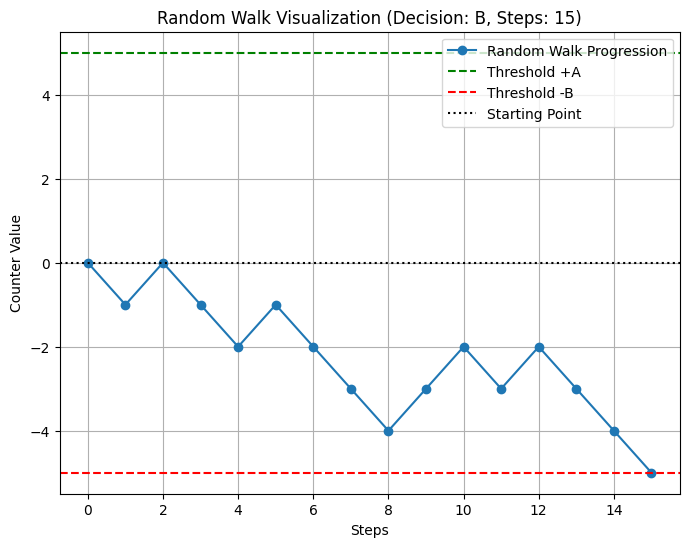

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Define the exemplar model parameters
rho = 2  # Euclidean distance
c = 0.5  # Sensitivity parameter
b = 1.0  # Background activation
gamma = 5  # Response threshold

# Define exemplars and their memory strengths
exemplars_A = [
    {"coordinates": [2, 3], "memory_strength": 2.0},
    {"coordinates": [3, 4], "memory_strength": 1.5},
]
exemplars_B = [
    {"coordinates": [6, 7], "memory_strength": 2.5},
    {"coordinates": [7, 8], "memory_strength": 1.0},
]

# Define a test item
test_item = [5, 7]

def calculate_distance(x, y, w=None, rho=2):
    """Calculate the weighted distance between two points."""
    if w is None:
        w = [1 / len(x)] * len(x)
    return sum(w[k] * abs(x[k] - y[k])**rho for k in range(len(x)))**(1 / rho)

def calculate_similarity(d, c):
    """Calculate similarity as an exponential decay function of distance."""
    return math.exp(-c * d)

def calculate_activation(exemplar, test_item, c):
    """Calculate the activation of an exemplar given a test item."""
    d = calculate_distance(exemplar["coordinates"], test_item)
    similarity = calculate_similarity(d, c)
    return exemplar["memory_strength"] * similarity

def calculate_summed_activation(exemplars, test_item, c):
    """Calculate the summed activation for a category."""
    return sum(calculate_activation(e, test_item, c) for e in exemplars)

def simulate_random_walk(S_A, S_B, b, gamma, max_steps=100):
    """Simulate a random walk to determine the category decision."""
    counter = 0
    step_count = 0
    history = [0]  # Track counter history for plotting
    while abs(counter) < gamma and step_count < max_steps:
        p_step = (S_A + b) / (S_A + S_B + 2 * b)
        step = 1 if np.random.random() < p_step else -1
        counter += step
        history.append(counter)
        step_count += 1
    decision = "A" if counter >= gamma else "B"
    return decision, step_count, history

# Calculate summed activations for each category
S_A = calculate_summed_activation(exemplars_A, test_item, c)
S_B = calculate_summed_activation(exemplars_B, test_item, c)

# Simulate the random walk
decision, steps, history = simulate_random_walk(S_A, S_B, b, gamma)

print(f"Decision: {decision}, Steps Taken: {steps}")

# Plot the random walk
plt.figure(figsize=(8, 6))
plt.plot(history, marker="o", label="Random Walk Progression")
plt.axhline(y=gamma, color="g", linestyle="--", label="Threshold +A")
plt.axhline(y=-gamma, color="r", linestyle="--", label="Threshold -B")
plt.axhline(y=0, color="black", linestyle=":", label="Starting Point")
plt.xlabel("Steps")
plt.ylabel("Counter Value")
plt.title(f"Random Walk Visualization (Decision: {decision}, Steps: {steps})")
plt.legend()
plt.grid(True)
plt.show()


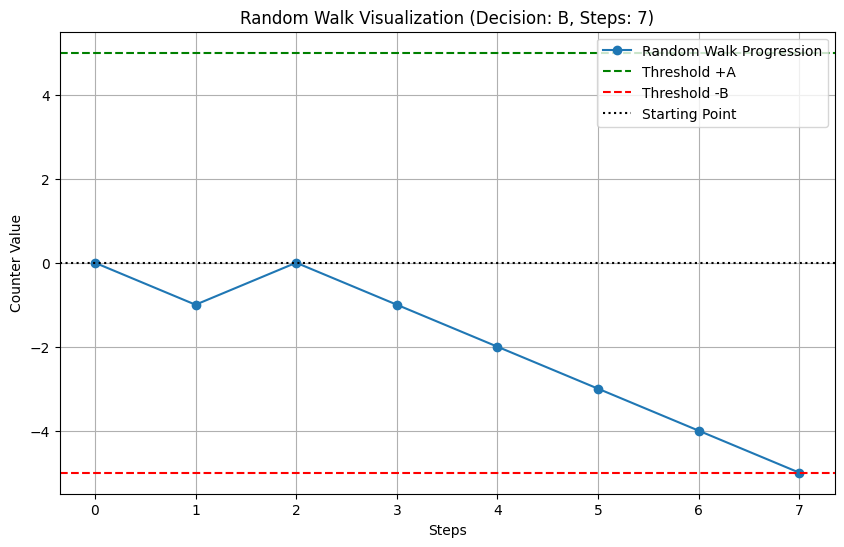

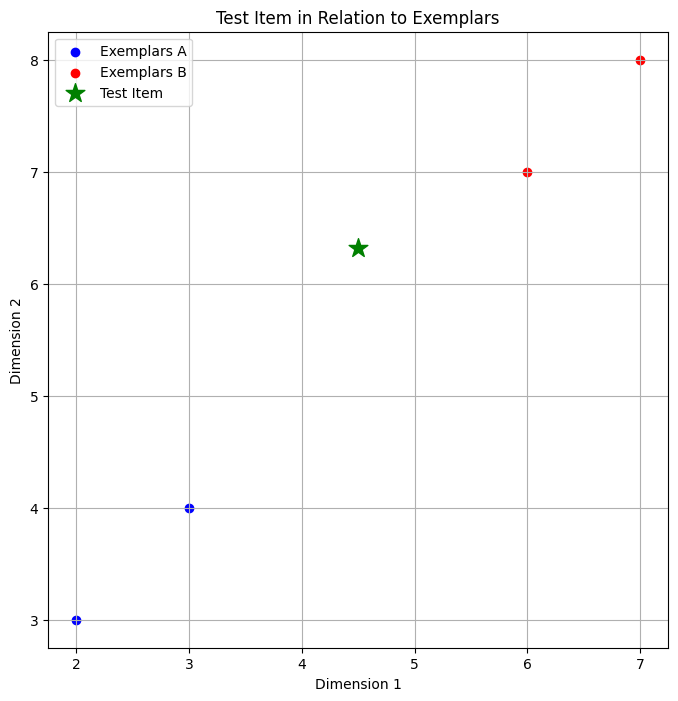

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

# Define the exemplar model parameters
rho = 2  # Euclidean distance
c = 0.5  # Sensitivity parameter
b = 1.0  # Background activation
gamma = 5  # Response threshold

# Define exemplars and their memory strengths
exemplars_A = [
    {"coordinates": [2, 3], "memory_strength": 2.0},
    {"coordinates": [3, 4], "memory_strength": 1.5},
]
exemplars_B = [
    {"coordinates": [6, 7], "memory_strength": 2.5},
    {"coordinates": [7, 8], "memory_strength": 1.0},
]

# Generate a random test item within the range of exemplar coordinates
def generate_random_test_item(exemplars):
    min_x = min(e["coordinates"][0] for e in exemplars)
    max_x = max(e["coordinates"][0] for e in exemplars)
    min_y = min(e["coordinates"][1] for e in exemplars)
    max_y = max(e["coordinates"][1] for e in exemplars)
    return [random.uniform(min_x, max_x), random.uniform(min_y, max_y)]

test_item = generate_random_test_item(exemplars_A + exemplars_B)

def calculate_distance(x, y, w=None, rho=2):
    """Calculate the weighted distance between two points."""
    if w is None:
        w = [1 / len(x)] * len(x)
    return sum(w[k] * abs(x[k] - y[k])**rho for k in range(len(x)))**(1 / rho)

def calculate_similarity(d, c):
    """Calculate similarity as an exponential decay function of distance."""
    return math.exp(-c * d)

def calculate_activation(exemplar, test_item, c):
    """Calculate the activation of an exemplar given a test item."""
    d = calculate_distance(exemplar["coordinates"], test_item)
    similarity = calculate_similarity(d, c)
    return exemplar["memory_strength"] * similarity

def calculate_summed_activation(exemplars, test_item, c):
    """Calculate the summed activation for a category."""
    return sum(calculate_activation(e, test_item, c) for e in exemplars)

def simulate_random_walk(S_A, S_B, b, gamma, max_steps=100):
    """Simulate a random walk to determine the category decision."""
    counter = 0
    step_count = 0
    history = [0]  # Track counter history for plotting
    while abs(counter) < gamma and step_count < max_steps:
        p_step = (S_A + b) / (S_A + S_B + 2 * b)
        step = 1 if np.random.random() < p_step else -1
        counter += step
        history.append(counter)
        step_count += 1
    decision = "A" if counter >= gamma else "B"
    return decision, step_count, history

# Calculate summed activations for each category
S_A = calculate_summed_activation(exemplars_A, test_item, c)
S_B = calculate_summed_activation(exemplars_B, test_item, c)

# Simulate the random walk
decision, steps, history = simulate_random_walk(S_A, S_B, b, gamma)

# Plot the random walk
plt.figure(figsize=(10, 6))
plt.plot(history, marker="o", label="Random Walk Progression")
plt.axhline(y=gamma, color="g", linestyle="--", label="Threshold +A")
plt.axhline(y=-gamma, color="r", linestyle="--", label="Threshold -B")
plt.axhline(y=0, color="black", linestyle=":", label="Starting Point")
plt.xlabel("Steps")
plt.ylabel("Counter Value")
plt.title(f"Random Walk Visualization (Decision: {decision}, Steps: {steps})")
plt.legend()
plt.grid(True)
plt.show()

# Plot the test item and exemplars
plt.figure(figsize=(8, 8))
plt.scatter(*zip(*[e["coordinates"] for e in exemplars_A]), color="blue", label="Exemplars A")
plt.scatter(*zip(*[e["coordinates"] for e in exemplars_B]), color="red", label="Exemplars B")
plt.scatter(test_item[0], test_item[1], color="green", marker="*", s=200, label="Test Item")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("Test Item in Relation to Exemplars")
plt.legend()
plt.grid(True)
plt.show()
